In [171]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [172]:
df=pd.read_csv(r"C:\Users\ROOPAL\Downloads\titanic\kaggle-titanic-master\kaggle-titanic-master\input\train.csv")

In [173]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [174]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

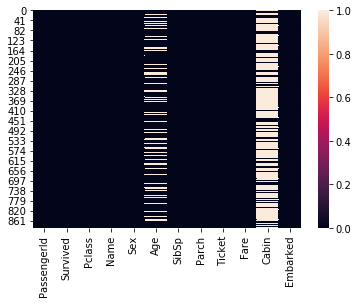

In [175]:
sns.heatmap(df.isnull())

In [176]:
df.Embarked=df.Embarked.fillna("ffill")

In [177]:
x=df.Age.mean()

In [178]:
df.Age=df.Age.fillna(x)

In [179]:
df.dropna(inplace=True)

In [180]:
from sklearn.preprocessing import LabelEncoder

In [181]:
le=LabelEncoder()

In [182]:
df["Sex"]=le.fit_transform(df.Sex)

In [183]:
df["Embarked"]=le.fit_transform(df.Embarked)

In [184]:
df.Sex.head()

1     0
3     0
6     1
10    0
11    0
Name: Sex, dtype: int32

In [185]:
X=df[["Pclass","Sex","Age","Fare","Embarked"]]

In [186]:
Y=df[["Survived"]]
Y.shape

(204, 1)

In [234]:
from sklearn.model_selection import train_test_split

In [235]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y)

In [236]:
from sklearn.tree import DecisionTreeClassifier

In [237]:
from sklearn.metrics import mean_squared_error

In [238]:
mean_squared_error(Y_test,y_pred)

0.5098039215686274

In [239]:
cl=DecisionTreeClassifier()

In [240]:
cl.fit(X_train,Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [241]:
cl.score(X_test,Y_test)

0.7254901960784313

In [242]:
Y=df.iloc[:,1].values
print(type(Y))
Y.ravel()
Y.shape

<class 'numpy.ndarray'>


(204,)

In [324]:
from sklearn.ensemble import RandomForestClassifier

In [346]:
rfc=RandomForestClassifier(criterion='gini',n_estimators=50,max_depth=6,random_state=0)

In [347]:
rfc.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=6, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [348]:
rfc.score(X_test,Y_test)

0.7647058823529411

In [349]:
y_pred=rfc.predict(X_test)

In [350]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

In [351]:
accuracy_score(Y_test,y_pred)

0.7647058823529411

In [352]:
mean_squared_error(Y_test,y_pred)

0.23529411764705882

Here it can be observed by tuning parameters we can get the results better than the decision tree